 Another proof of concept that GANs still allow us to create models that are equivalent on synthetic and original datasets. 

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Get fraud dataset

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

!unzip fraud-detection.zip

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


Sample for complexity issues

In [ ]:
df = df.sample(frac=0.5,random_state=1)

In [ ]:
df['is_fraud'].value_counts()

0    644584
1      3754
Name: is_fraud, dtype: int64

In [ ]:
for c in list(df):
  print(c)

Unnamed: 0
trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud


In [ ]:
df = df.drop(['first','last','Unnamed: 0','street','zip','trans_num','cc_num','city','merchant','job'],axis = 1)

In [ ]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
gender                    object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
from datetime import date

df['dob'] = pd.to_datetime(df['dob'])

tod = date.today().year

df['age'] = tod - df['dob'].apply(lambda x: x.year)

df = df.drop('dob',axis = 1)

In [ ]:
# Feature engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['year'] = df['trans_date_trans_time'].apply(lambda x: x.year)
df['month']= df['trans_date_trans_time'].apply(lambda x: x.month)
df['day']= df['trans_date_trans_time'].apply(lambda x: x.day)
df['hour']= df['trans_date_trans_time'].apply(lambda x: x.hour)

df = df.drop('trans_date_trans_time',axis= 1)

In [ ]:
for c in list(df):
  print(c)

merchant
category
amt
gender
state
lat
long
city_pop
job
unix_time
merch_lat
merch_long
is_fraud
age
year
month
day
hour


In [ ]:
num_var = ['amt','lat','long','city_pop','unix_time','merch_lat', 'merch_long','age','year', 'month', 'day', 'hour']

cat_var = ['category','gender', 'state']

taget = ['is_fraud']

df = df[cat_var+num_var+taget]

In [ ]:
df

,category,gender,state,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,age,year,month,day,hour,is_fraud
94102,grocery_net,F,ND,20.00,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959,75,2019,2,25,8,0
198791,home,F,WA,284.88,46.5901,-117.1692,761,1334260215,45.687331,-117.488135,80,2019,4,12,19,0
1238587,shopping_net,F,FL,5.07,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799,45,2020,5,31,21,0
619078,food_dining,F,GA,45.38,34.0770,-84.3033,165556,1348160812,34.551957,-83.374265,26,2019,9,20,17,0
573850,health_fitness,M,MI,27.52,43.6088,-83.9530,67858,1346455370,43.032957,-83.521294,28,2019,8,31,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053162,grocery_pos,F,UT,117.31,40.3207,-110.4360,302,1363141213,39.860518,-109.929939,33,2020,3,13,2,0
703785,entertainment,F,SD,21.60,43.2893,-97.1904,811,1351352246,43.271033,-96.550765,51,2019,10,27,15,0
435091,health_fitness,F,TX,24.66,33.6372,-96.6184,46563,1342213635,33.011344,-97.030919,53,2019,7,13,21,0
208353,grocery_pos,F,PA,187.78,40.1159,-74.8536,21125,1334556243,39.937815,-74.289703,38,2019,4,16,6,0


In [ ]:
#this function creates the dummies for 1 column
def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + str(col) + ': ' + str(name) for name in df_dummy.columns]
    return df_dummy

#this function uses the previous function to create dummies for all columns that need them
def dummies(df):
    dummy_df = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    df_out = pd.concat([df.drop(columns = object_cols), dummy_df.astype('int32')], axis = 1)
    return df_out.sort_index(ascending=False, axis=1)

In [ ]:
df = dummies(df)

In [ ]:
df.head()

,year,unix_time,month,merch_long,merch_lat,long,lat,is_fraud,hour,dum: state: WY,...,dum: category: home,dum: category: health_fitness,dum: category: grocery_pos,dum: category: grocery_net,dum: category: gas_transport,dum: category: food_dining,day,city_pop,amt,age
94102,2019,1330158280,2,-99.813959,46.398331,-100.7944,47.1709,0,8,0,...,0,0,0,1,0,0,25,1190,20.00,75
198791,2019,1334260215,4,-117.488135,45.687331,-117.1692,46.5901,0,19,0,...,1,0,0,0,0,0,12,761,284.88,80
1238587,2020,1370037053,5,-81.974799,27.254081,-82.2966,27.9551,0,21,0,...,0,0,0,0,0,0,31,79613,5.07,45
619078,2019,1348160812,9,-83.374265,34.551957,-84.3033,34.0770,0,17,0,...,0,0,0,0,0,1,20,165556,45.38,26
573850,2019,1346455370,8,-83.521294,43.032957,-83.9530,43.6088,0,23,0,...,0,1,0,0,0,0,31,67858,27.52,28


In [ ]:
df['is_fraud'].value_counts()

0    644584
1      3754
Name: is_fraud, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("is_fraud", axis = 1), 
                                                    df["is_fraud"], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def eval_result(model, X_test, y_test, validation = False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        pred = model.predict(X_test)

        print("\n", classification_report(y_test, pred, target_names = ['Not Fraud', 'Fraud']), "\n")

        display(pd.DataFrame(confusion_matrix(y_test, pred), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))
        
        print("\n")
        if hasattr(model, 'feature_importances_') and not validation:
            features = pd.DataFrame({
                'Variable'  :X_test.columns,
                'Importance':model.feature_importances_
            })
            features.sort_values('Importance', ascending=False, inplace=True)
            display(features.head(20))

        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc="lower right")
        plt.show()


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    193347
       Fraud       0.82      0.90      0.86      1155

    accuracy                           1.00    194502
   macro avg       0.91      0.95      0.93    194502
weighted avg       1.00      1.00      1.00    194502
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,193119,228
Fraud,119,1036


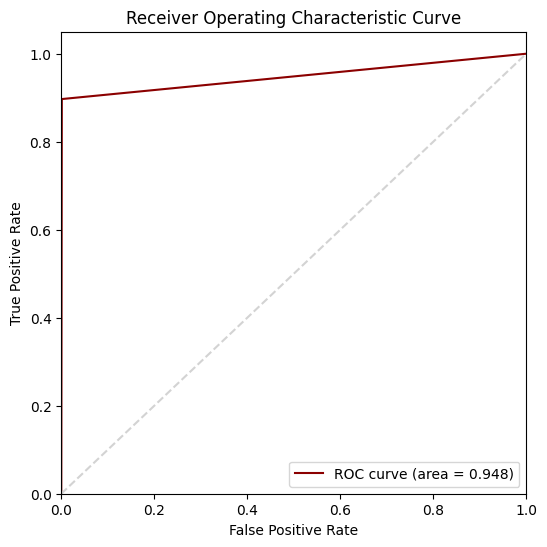

In [ ]:
xgbr = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr.fit(X_train, y_train)
eval_result(xgbr, X_test, y_test,validation= True)

In [ ]:
df_train = X_train
df_train['is_fraud'] = y_train


fraud_df = df_train[df_train['is_fraud']==1]
fraud_df = fraud_df.drop('is_fraud', axis = 1)

In [ ]:
X_train.shape

(907672, 76)

In [ ]:
discrete = []

for c in list(X_train):
  if c.split()[0]=='dum:':
    discrete.append(c)

In [ ]:
!pip install ctgan 

from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(fraud_df, discrete, epochs = 100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstallin

In [ ]:
def augmented_dataset_generation(model, og_dataset, p):
  n0 = len(og_dataset[og_dataset['is_fraud']==0])
  n1 = int(n0*p)
  samples = model.sample(n1)
  samples['is_fraud'] = 1
  augmented = pd.concat([samples,og_dataset],ignore_index=True, axis = 0)
  augmented = augmented.sample(frac=1).reset_index(drop=True)
  return augmented

In [ ]:
augmented10 = augmented_dataset_generation(ctgan, df_train, 0.1)
augmented30 = augmented_dataset_generation(ctgan, df_train, 0.3)
#augmented50 = augmented_dataset_generation(ctgan, df_train, 0.5)
#augmented80 = augmented_dataset_generation(ctgan, df_train, 0.8)
#augmented100 = augmented_dataset_generation(ctgan, df_train, 1)


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    193347
       Fraud       0.62      0.89      0.73      1155

    accuracy                           1.00    194502
   macro avg       0.81      0.94      0.86    194502
weighted avg       1.00      1.00      1.00    194502
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,192720,627
Fraud,127,1028


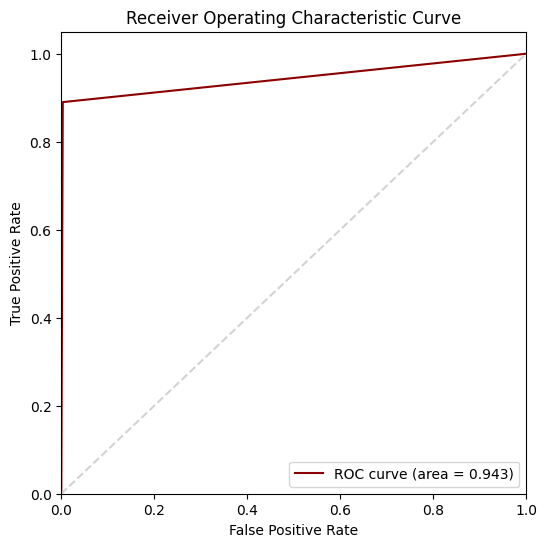

In [ ]:
xgbr_2 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)

X_train_a = augmented30.drop('is_fraud', axis = 1)
y_train_a = augmented30['is_fraud']
xgbr_2.fit(X_train_a, y_train_a)
eval_result(xgbr_2, X_test, y_test, validation = True)


               precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99    193347
       Fraud       0.18      0.90      0.31      1155

    accuracy                           0.98    194502
   macro avg       0.59      0.94      0.65    194502
weighted avg       0.99      0.98      0.98    194502
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,188780,4567
Fraud,121,1034


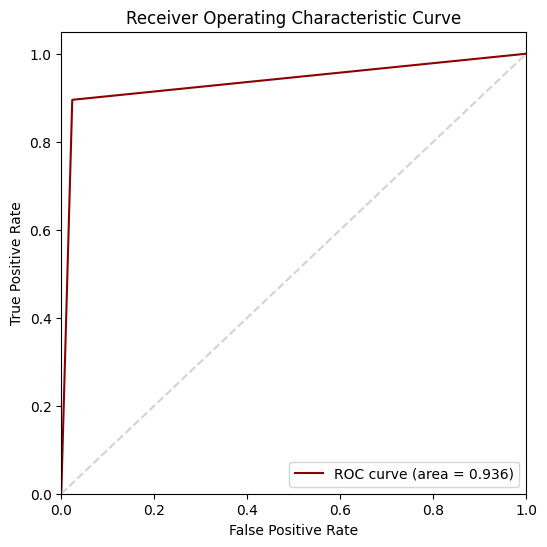

In [ ]:
from imblearn.over_sampling import SMOTE

# we create the smote object (upsampling)
sm = SMOTE(random_state=42,sampling_strategy=0.4)

#upsampling the minority class
X_upsampled, y_upsampled = sm.fit_resample(X_train.drop('is_fraud',axis=1), y_train)

xgbr_3 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr_3.fit(X_upsampled, y_upsampled)
eval_result(xgbr_3, X_test, y_test, validation = True)